# NFL Big Data Bowl 2026 - Final Visualizations

This notebook creates publication-ready visualizations for the competition submission.

**Goal**: Create 5-8 compelling, clear visualizations that tell the story of player convergence speed.

**Requirements**:
- Less than 10 figures total for submission
- High quality (300 DPI)
- Clear, accessible to coaches and fans
- Tell a coherent story

## Setup

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Set high-quality visualization defaults
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 11
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

print("✅ Setup complete!")

✅ Setup complete!


## Load Processed Data

In [2]:
# Load data from analysis notebook
DATA_DIR = Path('../data/processed')
FIGURES_DIR = Path('../figures')
FIGURES_DIR.mkdir(exist_ok=True)

print("Loading processed data...")

# Load main convergence data
convergence_df = pd.read_csv(DATA_DIR / 'convergence_speed_all_plays.csv')
print(f"✓ Convergence data: {len(convergence_df):,} rows")

# Load player rankings
defender_rankings = pd.read_csv(DATA_DIR / 'defender_convergence_rankings.csv')
print(f"✓ Defender rankings: {len(defender_rankings):,} players")

if (DATA_DIR / 'receiver_convergence_rankings.csv').exists():
    receiver_rankings = pd.read_csv(DATA_DIR / 'receiver_convergence_rankings.csv')
    print(f"✓ Receiver rankings: {len(receiver_rankings):,} players")

# Load position stats
position_stats = pd.read_csv(DATA_DIR / 'position_convergence_stats.csv')
print(f"✓ Position stats: {len(position_stats):,} positions")

print("\n✅ All data loaded!")

Loading processed data...
✓ Convergence data: 173,150 rows
✓ Defender rankings: 550 players
✓ Receiver rankings: 304 players
✓ Position stats: 14 positions

✅ All data loaded!


## Define Color Scheme and Style

Consistent colors throughout all visualizations

In [3]:
# Color scheme
ROLE_COLORS = {
    'Defensive Coverage': '#DC143C',  # Crimson red
    'Targeted Receiver': '#1E90FF',   # Dodger blue
    'Other Route Runner': '#32CD32',  # Lime green
    'Passer': '#FF8C00'               # Dark orange
}

MAIN_COLOR = '#2E86AB'  # Professional blue
ACCENT_COLOR = '#A23B72'  # Purple accent
POSITIVE_COLOR = '#06A77D'  # Green
NEGATIVE_COLOR = '#D4393D'  # Red

print("✅ Color scheme defined")

✅ Color scheme defined


## FIGURE 1: Hero Visualization - The Concept

A single-play example showing what convergence speed means

In [14]:
# Load input/output data for one example play
INPUT_DIR = Path('../data/114239_nfl_competition_files_published_analytics_final/train')

# Load week 2 for example
input_w02 = pd.read_csv(INPUT_DIR / 'input_2023_w18.csv')
output_w02 = pd.read_csv(INPUT_DIR / 'output_2023_w18.csv')

# Get a play with good convergence examples
example_game = input_w02['game_id'].iloc[10]  # Adjust to find a good example
example_play = input_w02['play_id'].iloc[10]

play_input = input_w02[(input_w02['game_id'] == example_game) & (input_w02['play_id'] == example_play)]
play_output = output_w02[(output_w02['game_id'] == example_game) & (output_w02['play_id'] == example_play)]
play_complete = pd.concat([play_input, play_output], ignore_index=True)

ball_land_x = play_input['ball_land_x'].iloc[0]
ball_land_y = play_input['ball_land_y'].iloc[0]

print(f"Example play: Game {example_game}, Play {example_play}")
print(f"Ball lands at: ({ball_land_x:.1f}, {ball_land_y:.1f})")

Example play: Game 2024010600, Play 77
Ball lands at: (88.5, 42.7)


In [18]:
input_w02.head()

,game_id,play_id,player_to_predict,nfl_id,frame_id,play_direction,absolute_yardline_number,player_name,player_height,player_weight,player_birth_date,player_position,player_side,player_role,x,y,s,a,dir,o,num_frames_output,ball_land_x,ball_land_y
0,2024010600,77,False,45395,1,left,83,Arthur Maulet,5-10,190,1993-07-13,CB,Defense,Defensive Coverage,80.56,30.48,1.79,0.83,356.85,76.40,10,88.459999,42.700001
1,2024010600,77,False,45395,2,left,83,Arthur Maulet,5-10,190,1993-07-13,CB,Defense,Defensive Coverage,80.54,30.66,1.75,0.95,353.08,77.45,10,88.459999,42.700001
2,2024010600,77,False,45395,3,left,83,Arthur Maulet,5-10,190,1993-07-13,CB,Defense,Defensive Coverage,80.51,30.83,1.74,1.19,347.95,80.41,10,88.459999,42.700001
3,2024010600,77,False,45395,4,left,83,Arthur Maulet,5-10,190,1993-07-13,CB,Defense,Defensive Coverage,80.47,31.00,1.73,1.30,342.59,82.75,10,88.459999,42.700001
4,2024010600,77,False,45395,5,left,83,Arthur Maulet,5-10,190,1993-07-13,CB,Defense,Defensive Coverage,80.41,31.16,1.72,1.52,336.20,82.75,10,88.459999,42.700001


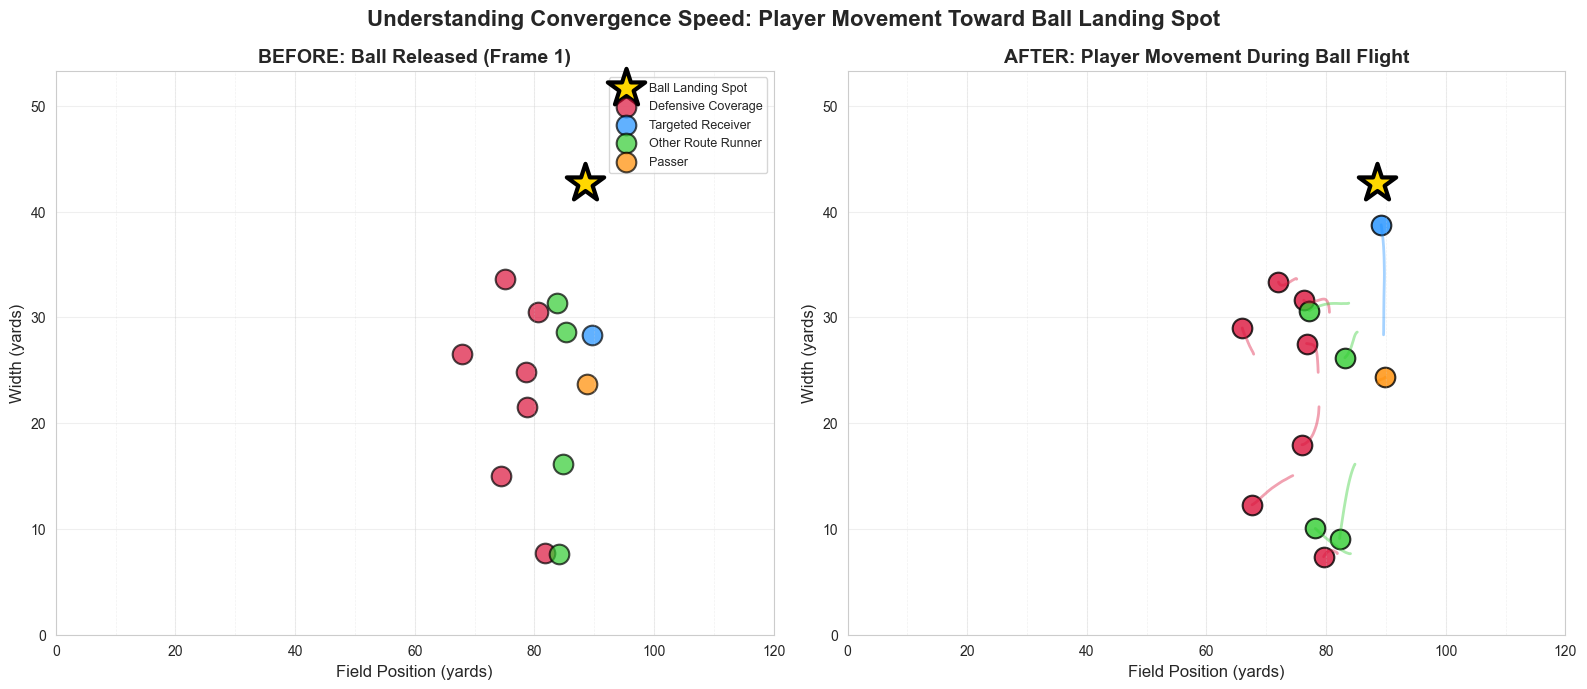

✅ Figure 1 saved!


In [15]:
# FIGURE 1: Concept visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Left: Initial positions (frame 1)
ax = axes[0]
frame_1 = play_complete[play_complete['frame_id'] == 1]

# Draw field
for yard in range(10, 111, 10):
    ax.axvline(yard, color='lightgray', linestyle='--', alpha=0.3, linewidth=0.5)

# Plot ball landing spot
ax.scatter(ball_land_x, ball_land_y, s=800, marker='*', 
          c='gold', edgecolors='black', linewidth=3, 
          label='Ball Landing Spot', zorder=10)

# Plot players by role
for role, color in ROLE_COLORS.items():
    role_players = frame_1[frame_1['player_role'] == role]
    if len(role_players) > 0:
        ax.scatter(role_players['x'], role_players['y'], 
                  s=200, c=color, alpha=0.7, 
                  edgecolors='black', linewidth=1.5,
                  label=role)

ax.set_xlim(0, 120)
ax.set_ylim(0, 53.3)
ax.set_xlabel('Field Position (yards)', fontsize=12)
ax.set_ylabel('Width (yards)', fontsize=12)
ax.set_title('BEFORE: Ball Released (Frame 1)', fontsize=14, fontweight='bold')
ax.legend(loc='upper right', fontsize=9)
ax.grid(alpha=0.3)

# Right: Final positions with trajectories
ax = axes[1]

# Draw field
for yard in range(10, 111, 10):
    ax.axvline(yard, color='lightgray', linestyle='--', alpha=0.3, linewidth=0.5)

# Plot ball landing spot
ax.scatter(ball_land_x, ball_land_y, s=800, marker='*', 
          c='gold', edgecolors='black', linewidth=3, 
          label='Ball Landing Spot', zorder=10)

# Plot trajectories
for role, color in ROLE_COLORS.items():
    role_players = play_complete[play_complete['player_role'] == role]
    
    for player_id in role_players['nfl_id'].unique():
        player_data = role_players[role_players['nfl_id'] == player_id].sort_values('frame_id')
        
        if len(player_data) > 1:
            # Draw trajectory
            ax.plot(player_data['x'], player_data['y'], 
                   '-', color=color, alpha=0.4, linewidth=2)
            
            # Mark final position
            ax.scatter(player_data['x'].iloc[-1], player_data['y'].iloc[-1],
                      s=200, c=color, alpha=0.8, 
                      edgecolors='black', linewidth=1.5)

ax.set_xlim(0, 120)
ax.set_ylim(0, 53.3)
ax.set_xlabel('Field Position (yards)', fontsize=12)
ax.set_ylabel('Width (yards)', fontsize=12)
ax.set_title('AFTER: Player Movement During Ball Flight', fontsize=14, fontweight='bold')
ax.grid(alpha=0.3)

plt.suptitle('Understanding Convergence Speed: Player Movement Toward Ball Landing Spot', 
            fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig(FIGURES_DIR / '01_concept_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Figure 1 saved!")

## FIGURE 2: Convergence Speed Distribution by Role

Show how different player roles behave differently

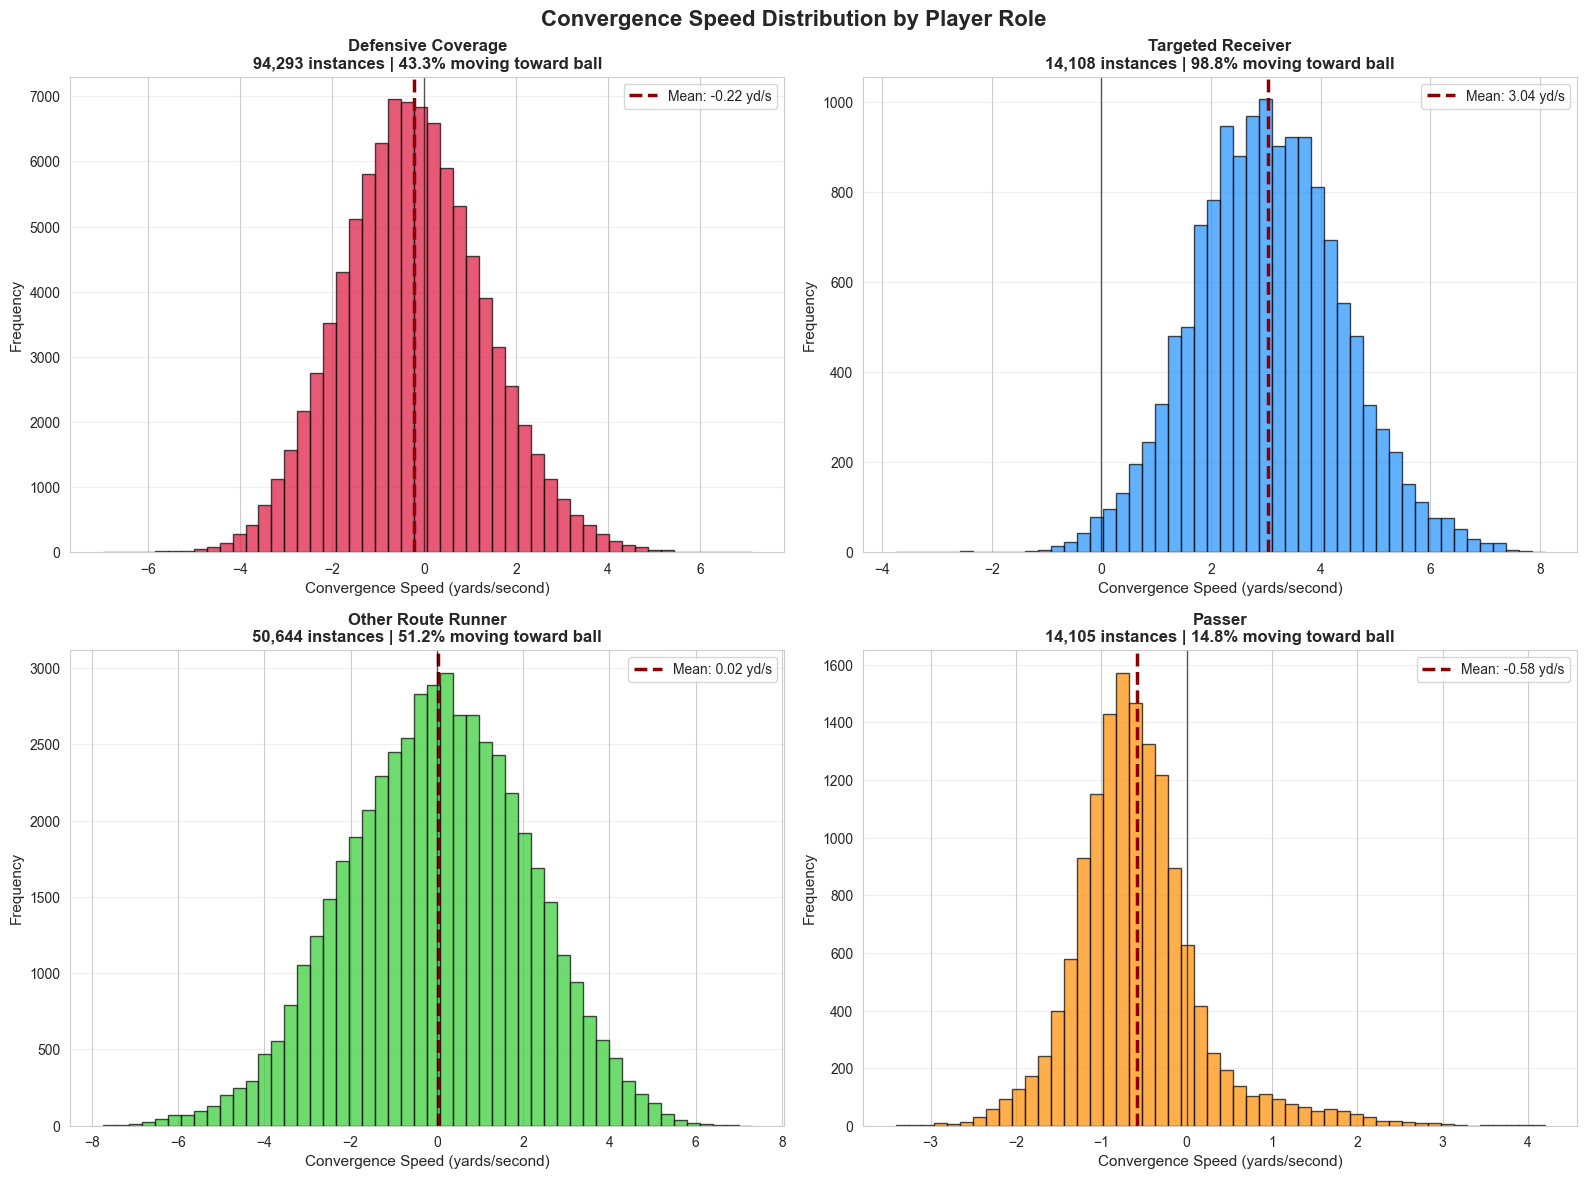

✅ Figure 2 saved!


In [6]:
# FIGURE 2: Distribution by role
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

roles = ['Defensive Coverage', 'Targeted Receiver', 'Other Route Runner', 'Passer']

for idx, role in enumerate(roles):
    role_data = convergence_df[convergence_df['player_role'] == role]
    
    if len(role_data) == 0:
        continue
    
    ax = axes[idx]
    
    # Histogram
    ax.hist(role_data['convergence_speed'], bins=50, 
           color=ROLE_COLORS[role], edgecolor='black', alpha=0.7)
    
    # Mean line
    mean_val = role_data['convergence_speed'].mean()
    ax.axvline(mean_val, color='darkred', linestyle='--', 
              linewidth=2.5, label=f'Mean: {mean_val:.2f} yd/s')
    
    # Zero line
    ax.axvline(0, color='black', linestyle='-', linewidth=1, alpha=0.6)
    
    # Annotations
    positive_pct = (role_data['convergence_speed'] > 0).sum() / len(role_data) * 100
    
    ax.set_xlabel('Convergence Speed (yards/second)', fontsize=11)
    ax.set_ylabel('Frequency', fontsize=11)
    ax.set_title(f'{role}\n{len(role_data):,} instances | {positive_pct:.1f}% moving toward ball', 
                fontsize=12, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(alpha=0.3, axis='y')

plt.suptitle('Convergence Speed Distribution by Player Role', 
            fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(FIGURES_DIR / '02_distribution_by_role.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Figure 2 saved!")

## FIGURE 3: Top Performers - Defenders

Highlight elite defensive convergers

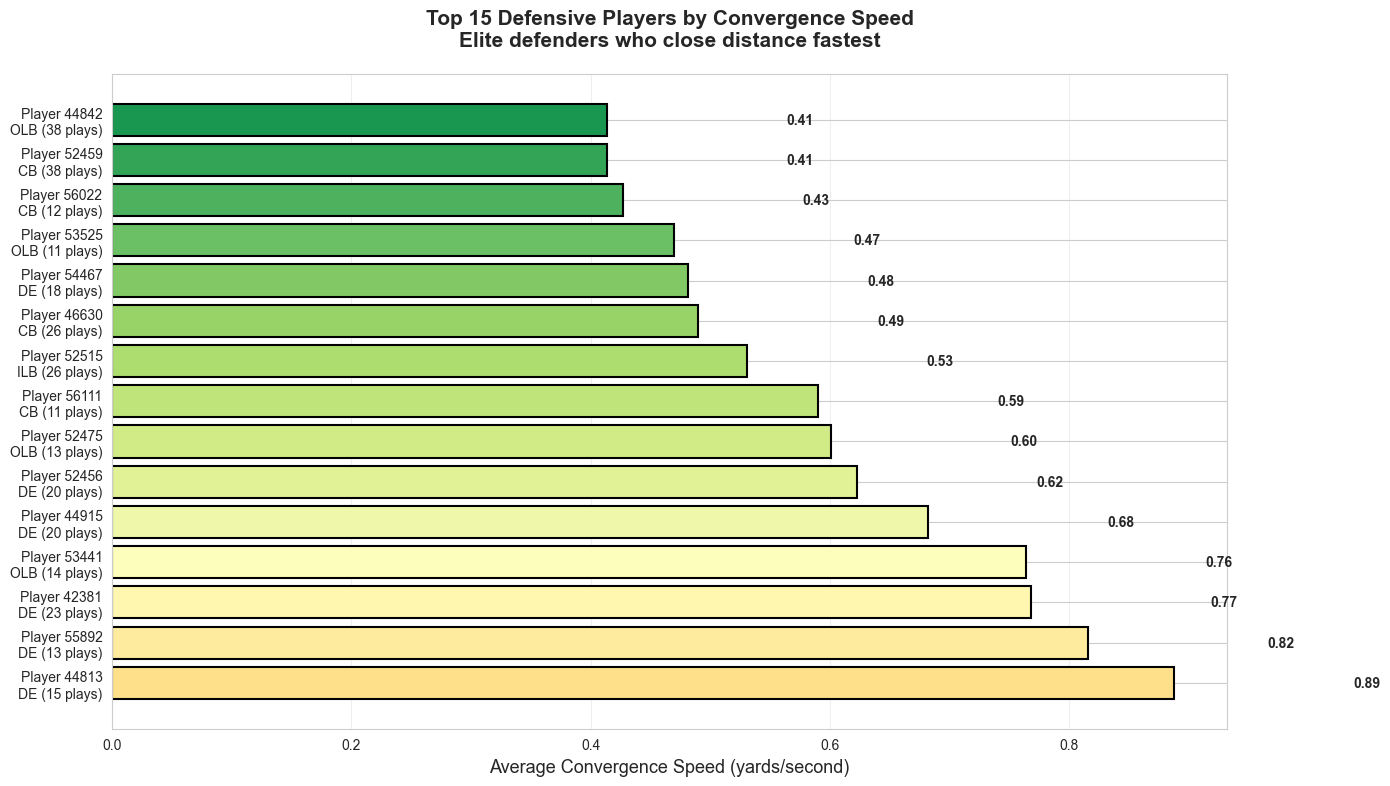

✅ Figure 3 saved!


In [7]:
# FIGURE 3: Top defensive performers
fig, ax = plt.subplots(figsize=(14, 8))

top_15_defenders = defender_rankings.nlargest(15, 'avg_convergence_speed')

# Create color gradient
colors = plt.cm.RdYlGn(np.linspace(0.4, 0.9, 15))

# Horizontal bar chart
y_pos = range(15)
bars = ax.barh(y_pos, top_15_defenders['avg_convergence_speed'].values, 
               color=colors, edgecolor='black', linewidth=1.5)

# Labels
ax.set_yticks(y_pos)
labels = [f"Player {int(nfl_id)}\n{pos} ({int(plays)} plays)" 
          for nfl_id, pos, plays in zip(top_15_defenders['nfl_id'], 
                                        top_15_defenders['position'],
                                        top_15_defenders['num_plays'])]
ax.set_yticklabels(labels, fontsize=10)

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars, top_15_defenders['avg_convergence_speed'].values)):
    ax.text(val + 0.15, i, f'{val:.2f}', va='center', 
           fontsize=10, fontweight='bold')

ax.set_xlabel('Average Convergence Speed (yards/second)', fontsize=13)
ax.set_title('Top 15 Defensive Players by Convergence Speed\nElite defenders who close distance fastest', 
            fontsize=15, fontweight='bold', pad=20)
ax.grid(alpha=0.3, axis='x')
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig(FIGURES_DIR / '03_top_defenders.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Figure 3 saved!")

## FIGURE 4: Position Analysis

Which positions excel at convergence?

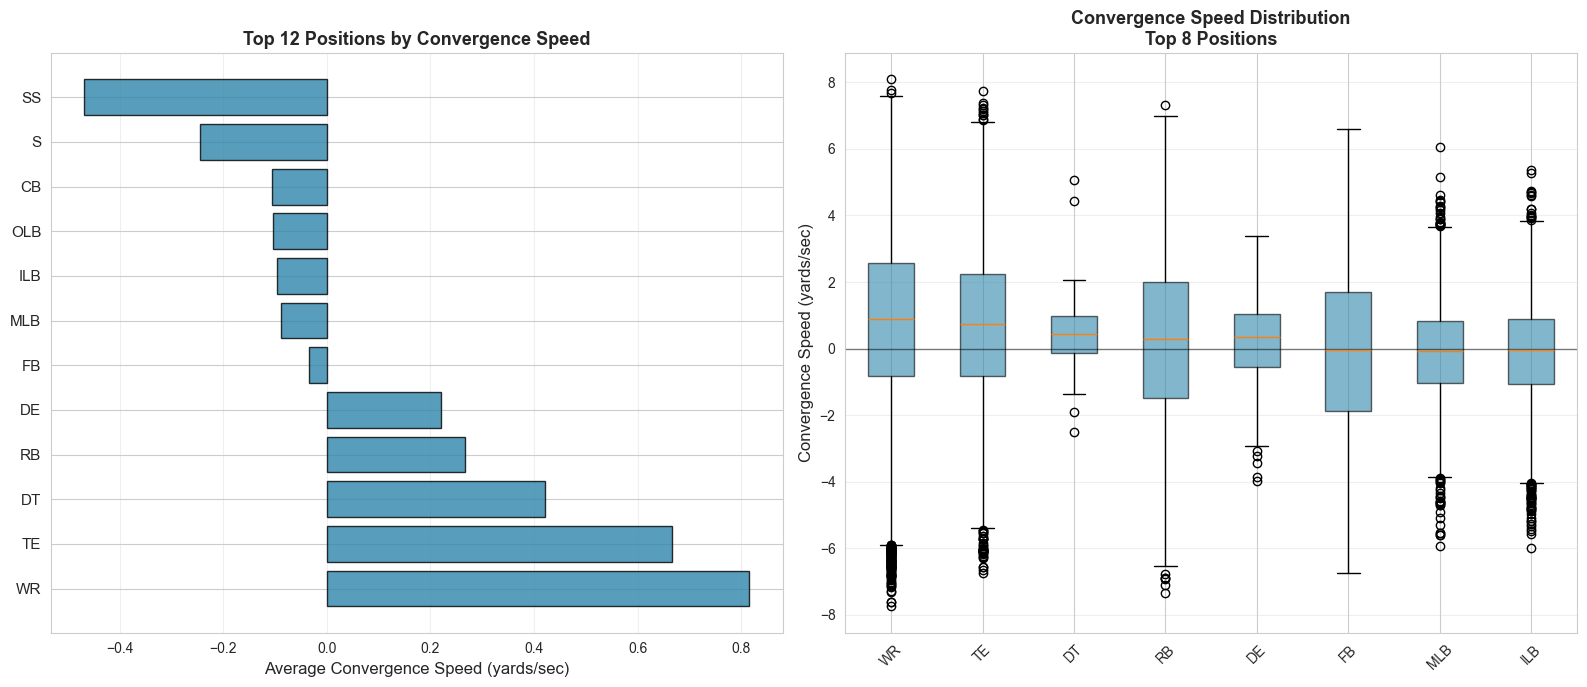

✅ Figure 4 saved!


In [8]:
# FIGURE 4: Position comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Left: Bar chart of top positions
ax = axes[0]
top_positions = position_stats.nlargest(12, 'avg_convergence_speed')

y_pos = range(len(top_positions))
ax.barh(y_pos, top_positions['avg_convergence_speed'], 
       color=MAIN_COLOR, edgecolor='black', alpha=0.8)

ax.set_yticks(y_pos)
ax.set_yticklabels(top_positions['position'], fontsize=11)
ax.set_xlabel('Average Convergence Speed (yards/sec)', fontsize=12)
ax.set_title('Top 12 Positions by Convergence Speed', fontsize=13, fontweight='bold')
ax.grid(alpha=0.3, axis='x')

# Right: Box plot of top 8
ax = axes[1]
top_8_positions = position_stats.nlargest(8, 'avg_convergence_speed')['position'].tolist()

data_to_plot = []
labels = []
for pos in top_8_positions:
    pos_data = convergence_df[convergence_df['player_position'] == pos]['convergence_speed']
    if len(pos_data) > 0:
        data_to_plot.append(pos_data)
        labels.append(pos)

bp = ax.boxplot(data_to_plot, labels=labels, patch_artist=True)

for patch in bp['boxes']:
    patch.set_facecolor(MAIN_COLOR)
    patch.set_alpha(0.6)

ax.set_ylabel('Convergence Speed (yards/sec)', fontsize=12)
ax.set_title('Convergence Speed Distribution\nTop 8 Positions', fontsize=13, fontweight='bold')
ax.tick_params(axis='x', rotation=45)
ax.grid(alpha=0.3, axis='y')
ax.axhline(0, color='black', linestyle='-', linewidth=1, alpha=0.5)

plt.tight_layout()
plt.savefig(FIGURES_DIR / '04_position_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Figure 4 saved!")

## FIGURE 5: Speed vs Convergence Relationship

Does speed correlate with convergence ability?

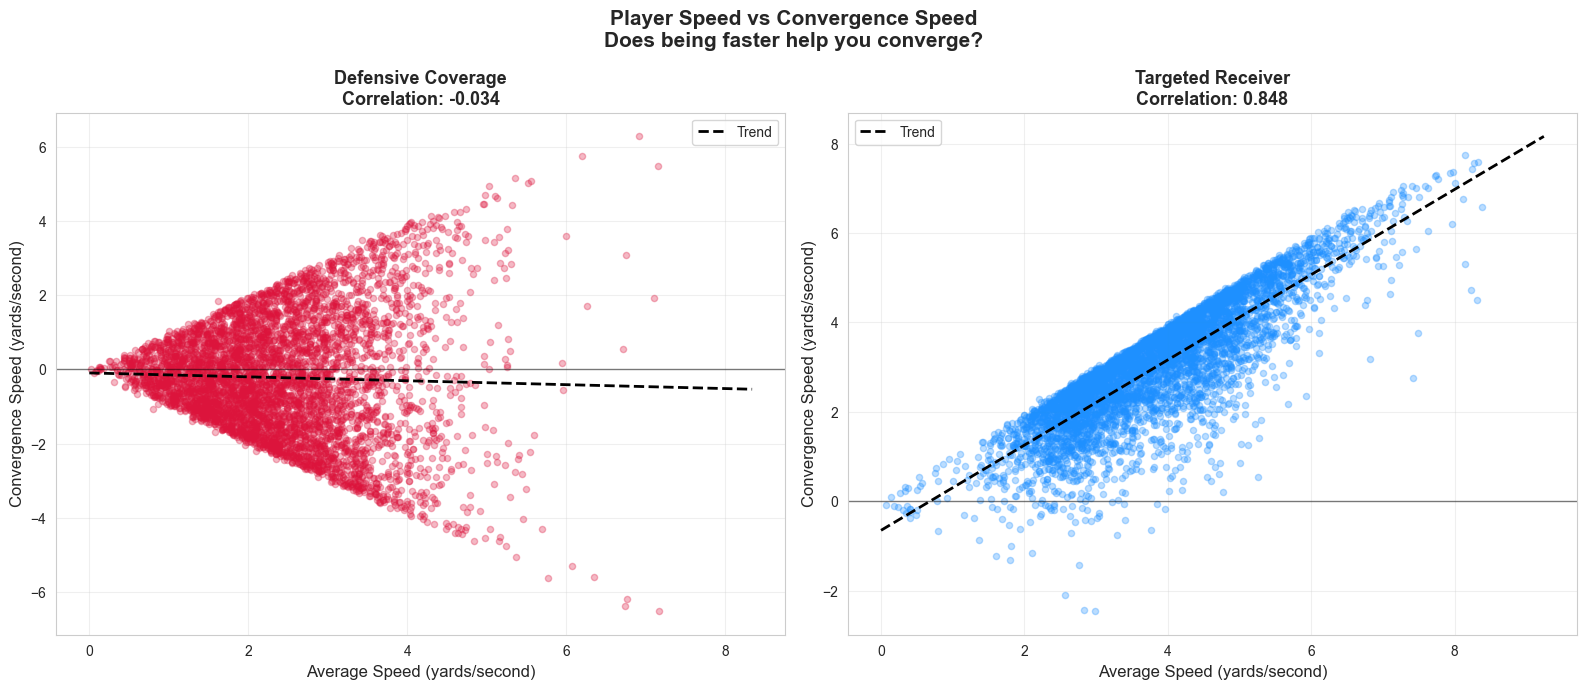

✅ Figure 5 saved!


In [9]:
# FIGURE 5: Speed correlation analysis
import numpy as np
import matplotlib.pyplot as plt

def safe_line(x, y):
    x = x.replace([np.inf, -np.inf], np.nan).dropna()
    y = y.replace([np.inf, -np.inf], np.nan).dropna()
    df = pd.DataFrame({'x': x, 'y': y}).dropna()
    if len(df) < 2:
        return None, None, None
    z = np.polyfit(df['x'], df['y'], 1)
    p = np.poly1d(z)
    x_line = np.linspace(df['x'].min(), df['x'].max(), 100)
    corr = df['x'].corr(df['y'])
    return x_line, p(x_line), corr

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Left: Defenders
ax = axes[0]
defenders = convergence_df[convergence_df['player_role'] == 'Defensive Coverage']
sample_def = defenders.sample(min(5000, len(defenders)), random_state=42) if len(defenders) else defenders

ax.scatter(sample_def['avg_speed'], sample_def['convergence_speed'],
           alpha=0.3, s=20, c=ROLE_COLORS['Defensive Coverage'])

x_line, y_line, corr = safe_line(defenders['avg_speed'], defenders['convergence_speed'])
if x_line is not None:
    ax.plot(x_line, y_line, "--", color='black', linewidth=2, label='Trend')
    corr_text = f"{corr:.3f}"
else:
    corr_text = "n/a"

ax.axhline(0, color='black', linestyle='-', linewidth=1, alpha=0.5)
ax.set_xlabel('Average Speed (yards/second)', fontsize=12)
ax.set_ylabel('Convergence Speed (yards/second)', fontsize=12)
ax.set_title(f'Defensive Coverage\nCorrelation: {corr_text}',
             fontsize=13, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(alpha=0.3)

# Right: Receivers
ax = axes[1]
receivers = convergence_df[convergence_df['player_role'] == 'Targeted Receiver']

if len(receivers) > 0:
    sample_rec = receivers.sample(min(5000, len(receivers)), random_state=42)
    ax.scatter(sample_rec['avg_speed'], sample_rec['convergence_speed'],
               alpha=0.3, s=20, c=ROLE_COLORS['Targeted Receiver'])
    x_line, y_line, corr = safe_line(receivers['avg_speed'], receivers['convergence_speed'])
    if x_line is not None:
        ax.plot(x_line, y_line, "--", color='black', linewidth=2, label='Trend')
        corr_text = f"{corr:.3f}"
    else:
        corr_text = "n/a"
    ax.axhline(0, color='black', linestyle='-', linewidth=1, alpha=0.5)
    ax.set_xlabel('Average Speed (yards/second)', fontsize=12)
    ax.set_ylabel('Convergence Speed (yards/second)', fontsize=12)
    ax.set_title(f'Targeted Receiver\nCorrelation: {corr_text}',
                 fontsize=13, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(alpha=0.3)
else:
    ax.text(0.5, 0.5, "No receiver rows found", ha='center', va='center', fontsize=12)
    ax.axis('off')

plt.suptitle('Player Speed vs Convergence Speed\nDoes being faster help you converge?',
             fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig(FIGURES_DIR / '05_speed_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Figure 5 saved!")


## FIGURE 6: Distance Impact

How does starting distance affect convergence?

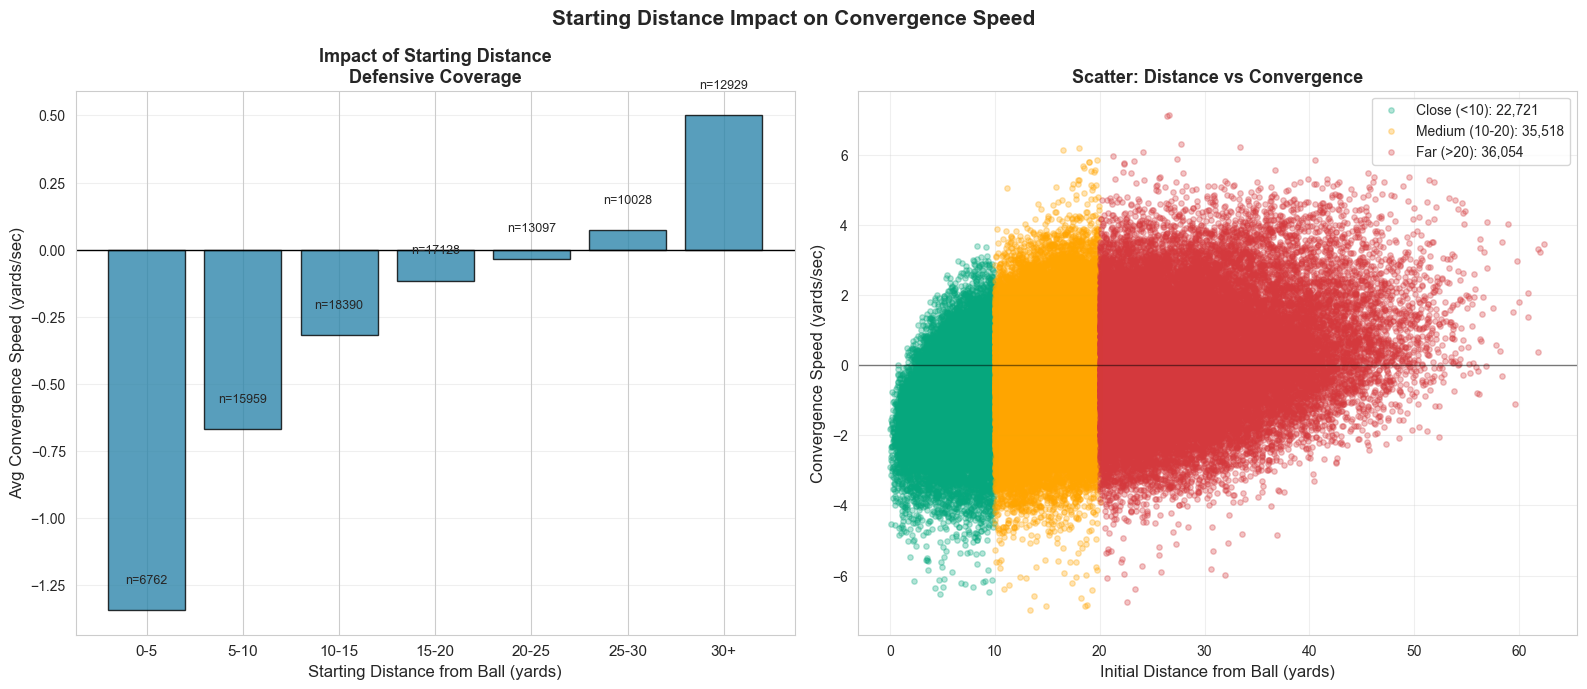

✅ Figure 6 saved!


In [10]:
# FIGURE 6: Starting distance impact
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

defenders = convergence_df[convergence_df['player_role'] == 'Defensive Coverage'].copy()

# Left: Binned analysis
ax = axes[0]

# Create distance bins
bins = [0, 5, 10, 15, 20, 25, 30, 100]
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30+']
defenders['distance_bin'] = pd.cut(defenders['initial_distance'], bins=bins, labels=labels, right=False)

bin_stats = defenders.groupby('distance_bin', observed=False)['convergence_speed'].agg(['mean', 'count']).reset_index()
bin_stats = bin_stats.dropna()
bin_stats = bin_stats[bin_stats['count'] >= 50]  # Filter low-count bins

ax.bar(range(len(bin_stats)), bin_stats['mean'],
       color=MAIN_COLOR, edgecolor='black', alpha=0.8)
ax.set_xticks(range(len(bin_stats)))
ax.set_xticklabels(bin_stats['distance_bin'], fontsize=11)
ax.set_xlabel('Starting Distance from Ball (yards)', fontsize=12)
ax.set_ylabel('Avg Convergence Speed (yards/sec)', fontsize=12)
ax.set_title('Impact of Starting Distance\nDefensive Coverage', fontsize=13, fontweight='bold')
ax.grid(alpha=0.3, axis='y')
ax.axhline(0, color='black', linestyle='-', linewidth=1)

# Add count labels
for i, (mean, count) in enumerate(zip(bin_stats['mean'], bin_stats['count'])):
    ax.text(i, mean + 0.1, f'n={int(count)}', ha='center', fontsize=9)

# Right: Scatter with distance categories
ax = axes[1]

close = defenders[defenders['initial_distance'] < 10]
medium = defenders[(defenders['initial_distance'] >= 10) & (defenders['initial_distance'] < 20)]
far = defenders[defenders['initial_distance'] >= 20]

ax.scatter(close['initial_distance'], close['convergence_speed'],
           alpha=0.3, s=15, c=POSITIVE_COLOR, label=f'Close (<10): {len(close):,}')
ax.scatter(medium['initial_distance'], medium['convergence_speed'],
           alpha=0.3, s=15, c='#FFA500', label=f'Medium (10-20): {len(medium):,}')
ax.scatter(far['initial_distance'], far['convergence_speed'],
           alpha=0.3, s=15, c=NEGATIVE_COLOR, label=f'Far (>20): {len(far):,}')

ax.axhline(0, color='black', linestyle='-', linewidth=1, alpha=0.5)
ax.set_xlabel('Initial Distance from Ball (yards)', fontsize=12)
ax.set_ylabel('Convergence Speed (yards/sec)', fontsize=12)
ax.set_title('Scatter: Distance vs Convergence', fontsize=13, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(alpha=0.3)

plt.suptitle('Starting Distance Impact on Convergence Speed',
             fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig(FIGURES_DIR / '06_distance_impact.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Figure 6 saved!")


## FIGURE 7: Defender vs Receiver Comparison
Head-to-head: Who converges better?

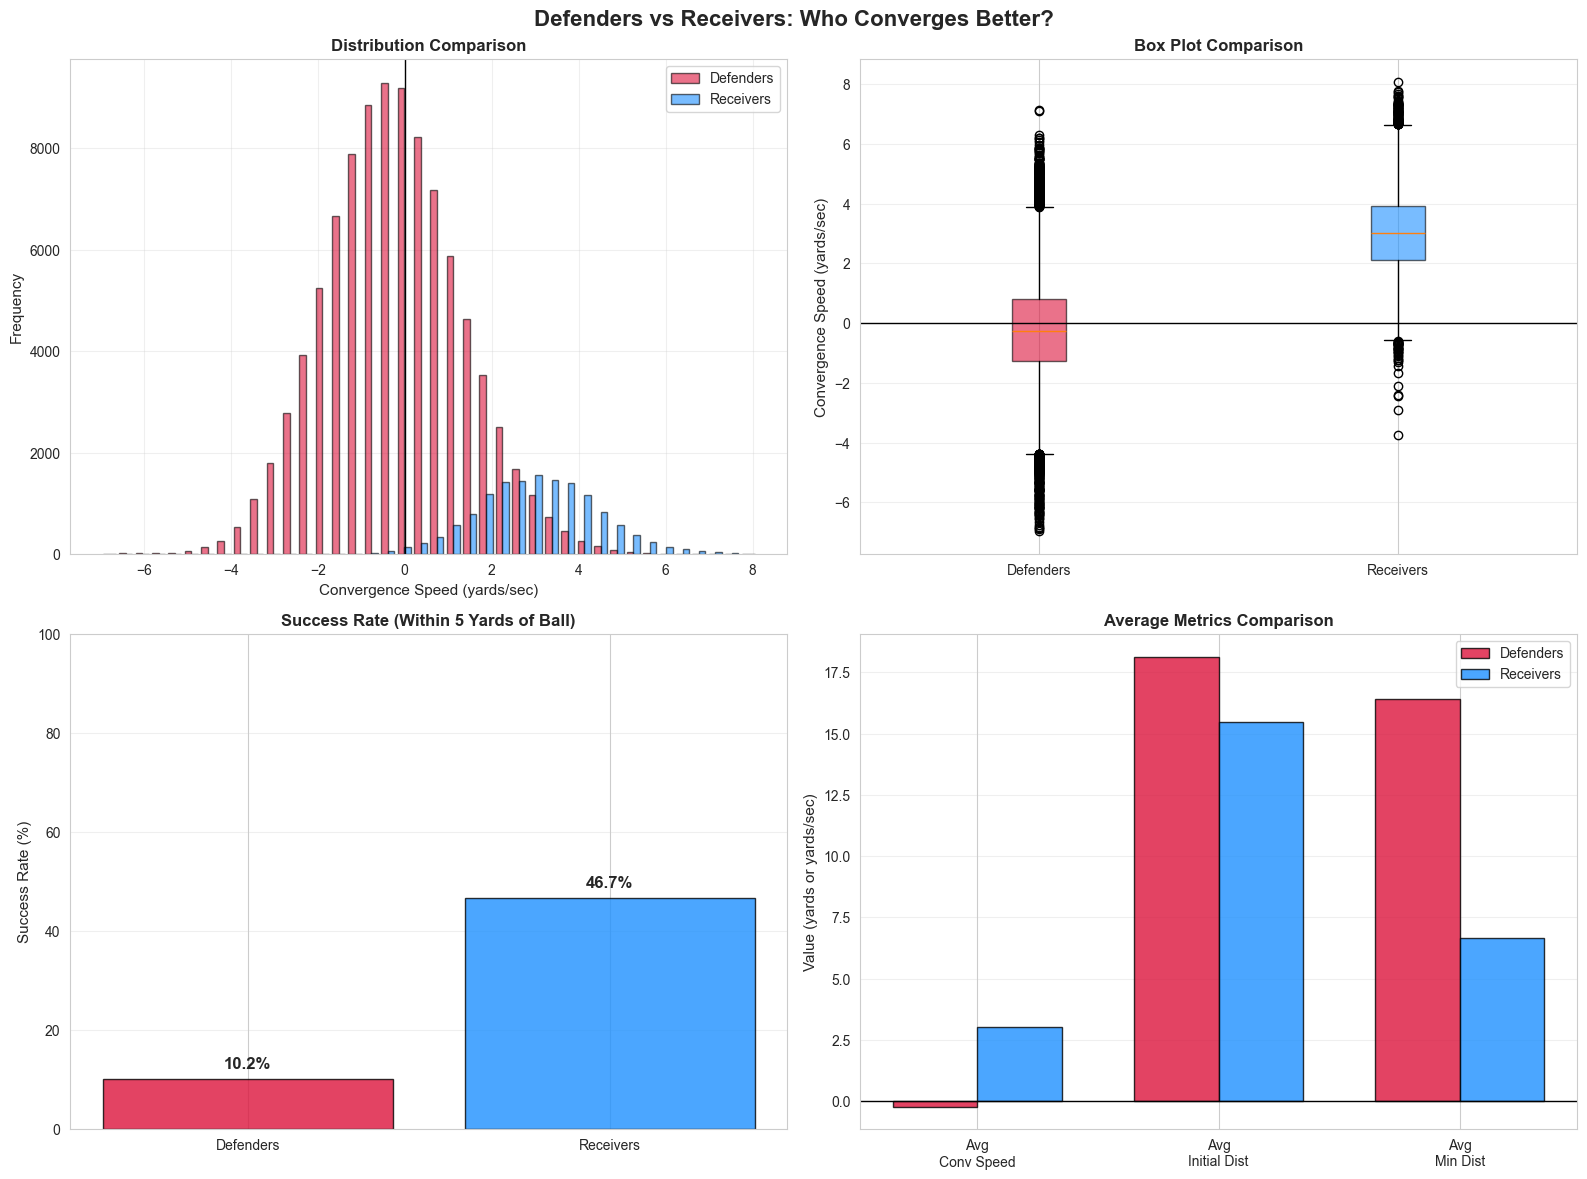

✅ Figure 7 saved!


In [11]:
# FIGURE 7: Defender vs Receiver comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

defenders = convergence_df[convergence_df['player_role'] == 'Defensive Coverage']
receivers = convergence_df[convergence_df['player_role'] == 'Targeted Receiver']

# Top left: Distribution comparison
ax = axes[0, 0]
ax.hist([defenders['convergence_speed'], receivers['convergence_speed']], 
        bins=40, label=['Defenders', 'Receivers'],
        color=[ROLE_COLORS['Defensive Coverage'], ROLE_COLORS['Targeted Receiver']],
        alpha=0.6, edgecolor='black')
ax.axvline(0, color='black', linestyle='-', linewidth=1)
ax.set_xlabel('Convergence Speed (yards/sec)', fontsize=11)
ax.set_ylabel('Frequency', fontsize=11)
ax.set_title('Distribution Comparison', fontsize=12, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(alpha=0.3)

# Top right: Box plot comparison
ax = axes[0, 1]
bp = ax.boxplot([defenders['convergence_speed'], receivers['convergence_speed']],
                labels=['Defenders', 'Receivers'],
                patch_artist=True)

for patch, color in zip(bp['boxes'],
                        [ROLE_COLORS['Defensive Coverage'], ROLE_COLORS['Targeted Receiver']]):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)

ax.axhline(0, color='black', linestyle='-', linewidth=1)
ax.set_ylabel('Convergence Speed (yards/sec)', fontsize=11)
ax.set_title('Box Plot Comparison', fontsize=12, fontweight='bold')
ax.grid(alpha=0.3, axis='y')

# Bottom left: Success rates
ax = axes[1, 0]
def_success = (defenders['min_distance'] < 5).mean() * 100 if len(defenders) else 0.0
rec_success = (receivers['min_distance'] < 5).mean() * 100 if len(receivers) else 0.0

bars = ax.bar(['Defenders', 'Receivers'], [def_success, rec_success],
              color=[ROLE_COLORS['Defensive Coverage'], ROLE_COLORS['Targeted Receiver']],
              edgecolor='black', alpha=0.8)

for bar, val in zip(bars, [def_success, rec_success]):
    ax.text(bar.get_x() + bar.get_width()/2, val + 2, f'{val:.1f}%',
            ha='center', fontsize=12, fontweight='bold')

ax.set_ylabel('Success Rate (%)', fontsize=11)
ax.set_title('Success Rate (Within 5 Yards of Ball)', fontsize=12, fontweight='bold')
ax.grid(alpha=0.3, axis='y')
ax.set_ylim(0, 100)

# Bottom right: Average metrics comparison
ax = axes[1, 1]
metrics = ['Avg\nConv Speed', 'Avg\nInitial Dist', 'Avg\nMin Dist']
def_vals = [
    defenders['convergence_speed'].mean(),
    defenders['initial_distance'].mean(),
    defenders['min_distance'].mean()
] if len(defenders) else [0, 0, 0]
rec_vals = [
    receivers['convergence_speed'].mean(),
    receivers['initial_distance'].mean(),
    receivers['min_distance'].mean()
] if len(receivers) else [0, 0, 0]

x = np.arange(len(metrics))
width = 0.35

ax.bar(x - width/2, def_vals, width, label='Defenders',
       color=ROLE_COLORS['Defensive Coverage'], edgecolor='black', alpha=0.8)
ax.bar(x + width/2, rec_vals, width, label='Receivers',
       color=ROLE_COLORS['Targeted Receiver'], edgecolor='black', alpha=0.8)

ax.set_ylabel('Value (yards or yards/sec)', fontsize=11)
ax.set_title('Average Metrics Comparison', fontsize=12, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=10)
ax.legend(fontsize=10)
ax.grid(alpha=0.3, axis='y')
ax.axhline(0, color='black', linestyle='-', linewidth=1)

plt.suptitle('Defenders vs Receivers: Who Converges Better?',
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(FIGURES_DIR / '07_defender_vs_receiver.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Figure 7 saved!")


# FIGURE 8: Summary infographic

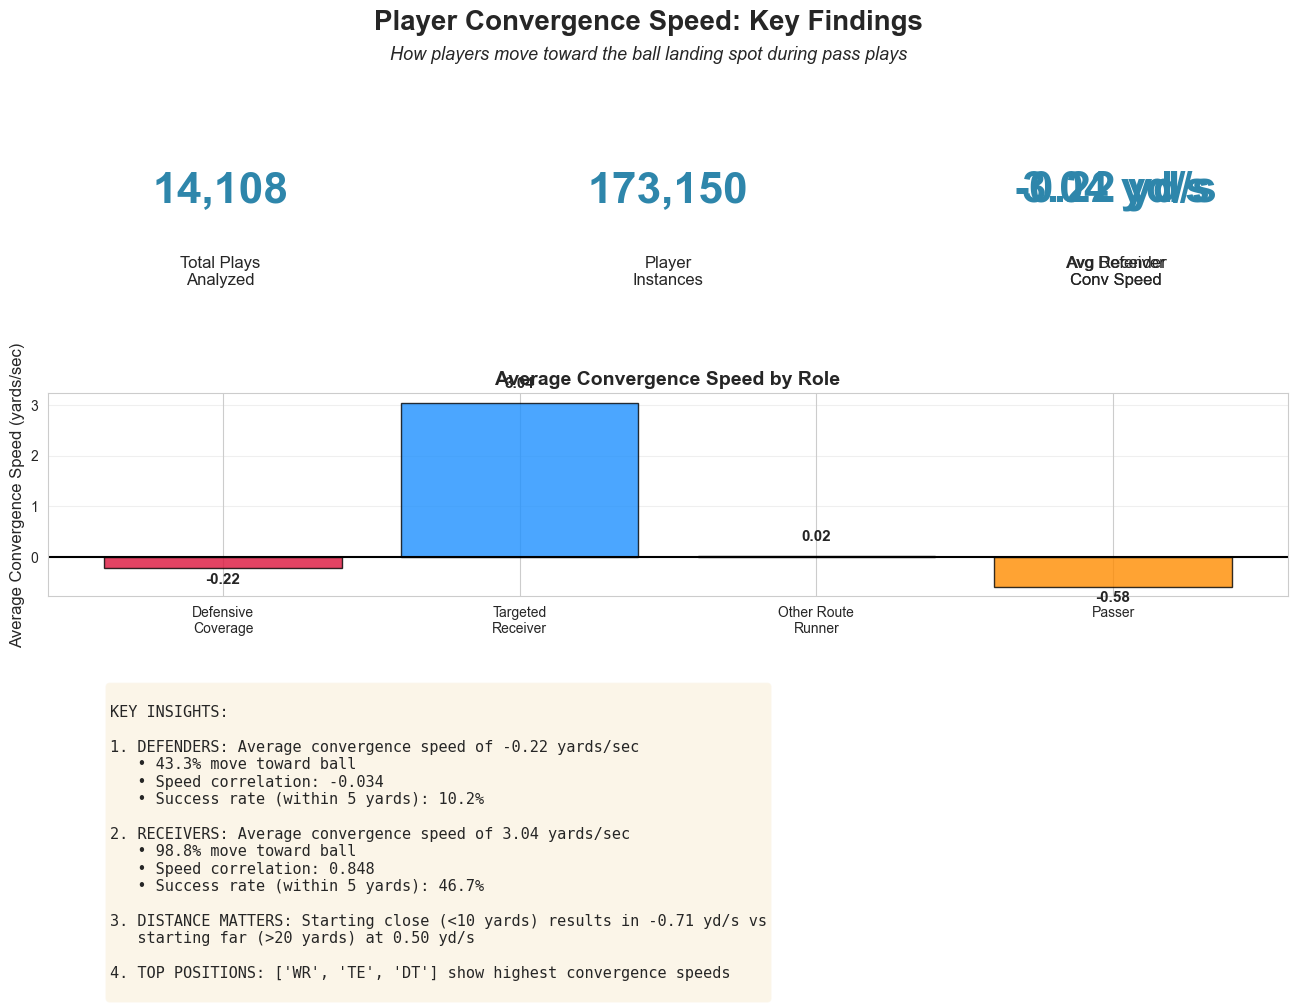

✅ Figure 8 saved!


In [12]:
# FIGURE 8: Summary infographic
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 3, hspace=0.4, wspace=0.3)

# Calculate key stats
defenders = convergence_df[convergence_df['player_role'] == 'Defensive Coverage']
receivers = convergence_df[convergence_df['player_role'] == 'Targeted Receiver']

# Title area
fig.text(0.5, 0.96, 'Player Convergence Speed: Key Findings',
         ha='center', fontsize=20, fontweight='bold')
fig.text(0.5, 0.93, 'How players move toward the ball landing spot during pass plays',
         ha='center', fontsize=13, style='italic')

# Stat boxes (top row)
stat_data = [
    ('Total Plays\nAnalyzed', f"{convergence_df.groupby(['game_id', 'play_id']).ngroups:,}"),
    ('Player\nInstances', f"{len(convergence_df):,}"),
    ('Avg Defender\nConv Speed', f"{defenders['convergence_speed'].mean():.2f} yd/s"),
    ('Avg Receiver\nConv Speed', f"{receivers['convergence_speed'].mean():.2f} yd/s")
]

for i, (label, value) in enumerate(stat_data):
    col = min(i, 2)  # keep within 3 columns
    ax = fig.add_subplot(gs[0, col])
    ax.text(0.5, 0.6, value, ha='center', va='center',
            fontsize=32, fontweight='bold', color=MAIN_COLOR)
    ax.text(0.5, 0.2, label, ha='center', va='center',
            fontsize=12, wrap=True)
    ax.axis('off')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

# Middle: Role comparison
ax1 = fig.add_subplot(gs[1, :])
roles = ['Defensive\nCoverage', 'Targeted\nReceiver', 'Other Route\nRunner', 'Passer']
role_keys = ['Defensive Coverage', 'Targeted Receiver', 'Other Route Runner', 'Passer']
avg_speeds = [convergence_df[convergence_df['player_role'] == role]['convergence_speed'].mean()
              for role in role_keys]
colors = [ROLE_COLORS[role] for role in role_keys]

bars = ax1.bar(roles, avg_speeds, color=colors, edgecolor='black', alpha=0.8)
ax1.axhline(0, color='black', linestyle='-', linewidth=1.5)
ax1.set_ylabel('Average Convergence Speed (yards/sec)', fontsize=12)
ax1.set_title('Average Convergence Speed by Role', fontsize=14, fontweight='bold')
ax1.grid(alpha=0.3, axis='y')

for bar, val in zip(bars, avg_speeds):
    y_pos = val + 0.3 if val > 0 else val - 0.3
    ax1.text(bar.get_x() + bar.get_width()/2, y_pos, f'{val:.2f}',
             ha='center', fontsize=11, fontweight='bold')

# Bottom: Key insights text
ax2 = fig.add_subplot(gs[2, :])
ax2.axis('off')

def safe_corr(a, b):
    s = pd.concat([a, b], axis=1).dropna()
    return s.iloc[:, 0].corr(s.iloc[:, 1]) if len(s) > 1 else np.nan

insights_text = f"""
KEY INSIGHTS:

1. DEFENDERS: Average convergence speed of {defenders['convergence_speed'].mean():.2f} yards/sec
   • {(defenders['convergence_speed'] > 0).mean() * 100:.1f}% move toward ball
   • Speed correlation: {safe_corr(defenders['avg_speed'], defenders['convergence_speed']):.3f}
   • Success rate (within 5 yards): {(defenders['min_distance'] < 5).mean() * 100:.1f}%

2. RECEIVERS: Average convergence speed of {receivers['convergence_speed'].mean():.2f} yards/sec
   • {(receivers['convergence_speed'] > 0).mean() * 100:.1f}% move toward ball
   • Speed correlation: {safe_corr(receivers['avg_speed'], receivers['convergence_speed']):.3f}
   • Success rate (within 5 yards): {(receivers['min_distance'] < 5).mean() * 100:.1f}%

3. DISTANCE MATTERS: Starting close (<10 yards) results in {convergence_df[convergence_df['initial_distance'] < 10]['convergence_speed'].mean():.2f} yd/s vs
   starting far (>20 yards) at {convergence_df[convergence_df['initial_distance'] > 20]['convergence_speed'].mean():.2f} yd/s

4. TOP POSITIONS: {position_stats.nlargest(3, 'avg_convergence_speed')['position'].tolist()} show highest convergence speeds
"""

ax2.text(0.05, 0.95, insights_text, transform=ax2.transAxes,
         fontsize=11, verticalalignment='top', family='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.savefig(FIGURES_DIR / '08_key_insights_summary.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Figure 8 saved!")


## Summary of Generated Figures

In [13]:
print("="*80)
print("VISUALIZATION SUMMARY")
print("="*80)
print("\nGenerated 8 figures for submission:\n")

figures = [
    ("01_concept_visualization.png", "What is convergence speed? (Before/After)"),
    ("02_distribution_by_role.png", "How do different roles behave?"),
    ("03_top_defenders.png", "Who are the elite defenders?"),
    ("04_position_analysis.png", "Which positions excel?"),
    ("05_speed_correlation.png", "Does speed matter?"),
    ("06_distance_impact.png", "How does starting distance affect convergence?"),
    ("07_defender_vs_receiver.png", "Who converges better?"),
    ("08_key_insights_summary.png", "One-page summary of findings")
]

for i, (filename, description) in enumerate(figures, 1):
    filepath = FIGURES_DIR / filename
    if filepath.exists():
        size_mb = filepath.stat().st_size / (1024**2)
        print(f"{i}. {filename}")
        print(f"   Purpose: {description}")
        print(f"   Size: {size_mb:.2f} MB")
        print()

print("\nAll figures saved to:")
print(f"  {FIGURES_DIR.absolute()}")
print("\n✅ Visualizations complete and ready for submission!")


VISUALIZATION SUMMARY

Generated 8 figures for submission:

1. 01_concept_visualization.png
   Purpose: What is convergence speed? (Before/After)
   Size: 0.33 MB

2. 02_distribution_by_role.png
   Purpose: How do different roles behave?
   Size: 0.39 MB

3. 03_top_defenders.png
   Purpose: Who are the elite defenders?
   Size: 0.34 MB

4. 04_position_analysis.png
   Purpose: Which positions excel?
   Size: 0.24 MB

5. 05_speed_correlation.png
   Purpose: Does speed matter?
   Size: 1.58 MB

6. 06_distance_impact.png
   Purpose: How does starting distance affect convergence?
   Size: 1.56 MB

7. 07_defender_vs_receiver.png
   Purpose: Who converges better?
   Size: 0.36 MB

8. 08_key_insights_summary.png
   Purpose: One-page summary of findings
   Size: 0.46 MB


All figures saved to:
  d:\PyScripts\NFL-Big-Data-Bowl-2026-Analytics\notebooks\..\figures

✅ Visualizations complete and ready for submission!


## READY FOR SUBMISSION

In [ ]:
print("\n" + "="*80)
print("READY FOR SUBMISSION")
print("="*80)
print(
    """
Your visualization notebook is complete!

You now have 8 publication-ready figures that:
✓ Explain the convergence speed concept clearly
✓ Show patterns across player roles
✓ Highlight elite performers
✓ Analyze key factors (speed, distance, position)
✓ Compare defenders vs receivers
✓ Summarize key insights

Next: Write your Kaggle submission writeup!
"""
)
